In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset(path):
    df = pd.read_csv(path, delimiter=',' , engine='python')
    return df


In [3]:
path="..\DatasetExos.csv"
df = load_dataset(path)

In [4]:
def display_dataset(df):
   
    print("\nNumber of attributes (columns):")
    print(len(df.columns))
    
    print("\nNumber of rows:")
    print(len(df))
    
    print("\nValues of the attribute 'Category':")
    print(df["Category"].value_counts())
    
    print("\nValues of the attribute 'Exercise':")
    print(df["Exercise"].value_counts())

    print("Dataset header:\n")
    print(df.head())


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ep (ms)   8996 non-null   object 
 1   Acc_x     9005 non-null   float64
 2   Acc_y     9009 non-null   float64
 3   Acc_z     9008 non-null   float64
 4   Gyro_x    9008 non-null   float64
 5   Gyro_y    9002 non-null   float64
 6   Gyro_z    9009 non-null   float64
 7   ID        9009 non-null   object 
 8   Exercise  9009 non-null   object 
 9   Category  9003 non-null   object 
 10  Set       8999 non-null   float64
dtypes: float64(7), object(4)
memory usage: 774.3+ KB


In [6]:
display_dataset(df)


Number of attributes (columns):
11

Number of rows:
9009

Values of the attribute 'Category':
Category
medium      4434
heavy       3458
standing     600
sitting      510
heav           1
Name: count, dtype: int64

Values of the attribute 'Exercise':
Exercise
ohp      1676
bench    1665
squat    1610
dead     1531
row      1415
rest     1109
raw         2
reste       1
Name: count, dtype: int64
Dataset header:

                   ep (ms)     Acc_x     Acc_y     Acc_z  Gyro_x  Gyro_y  \
0  2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392   
1  2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904   
2  2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560   
3  2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244   
4  2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486   

   Gyro_z ID Exercise Category   Set  
0  0.9388  B    bench    heavy  30.0  
1  2.1708  B    bench    heavy  30.0  
2 -1.4146 

In [10]:
def scatter_plot(attribute_name_x,attribute_name_y,attribute_values_x,attribute_values_y):
    plt.figure()
    plt.title("Scatter Plot")
    plt.xlabel(attribute_name_x)
    plt.ylabel(attribute_name_y)
    plt.scatter(attribute_values_x,attribute_values_y)
    plt.show()

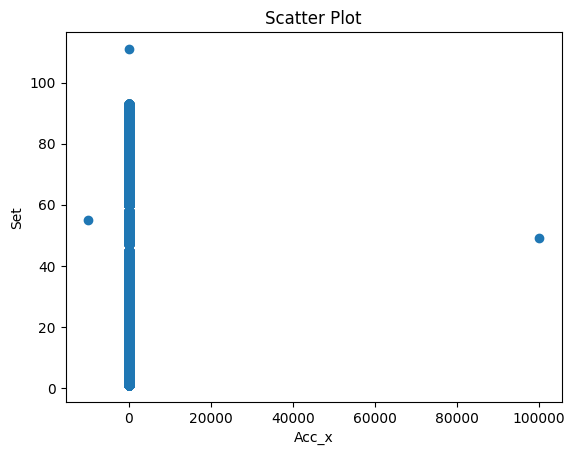

In [11]:
scatter_plot("Acc_x","Set",df["Acc_x"],df["Set"])

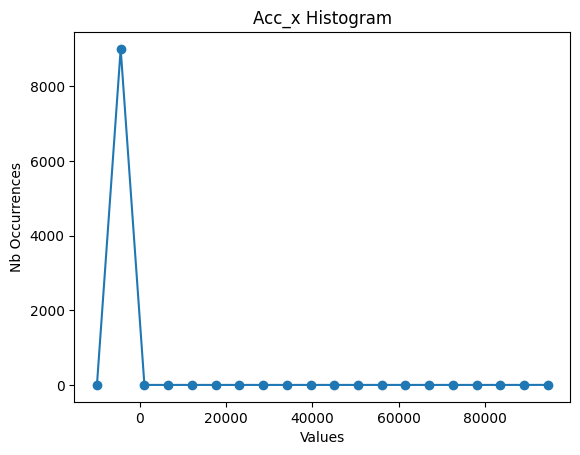

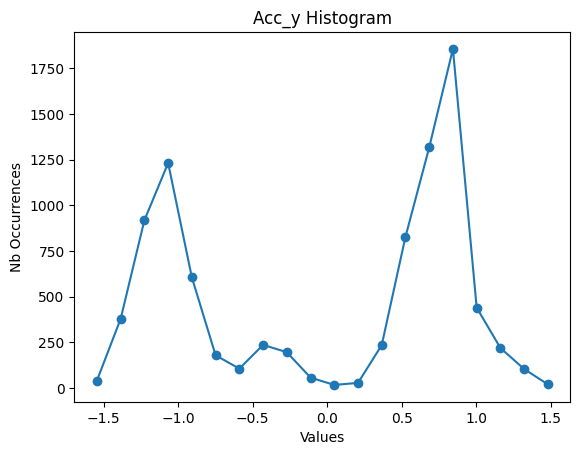

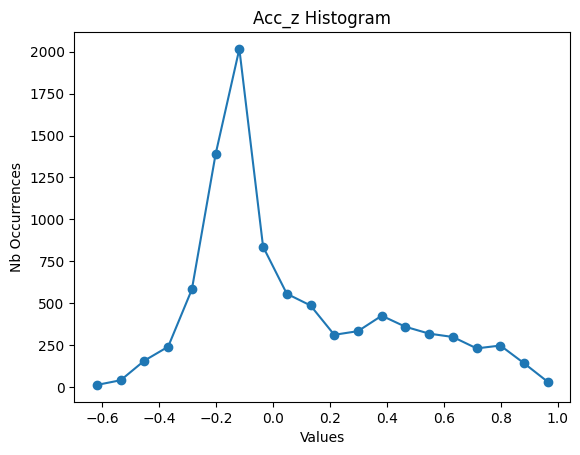

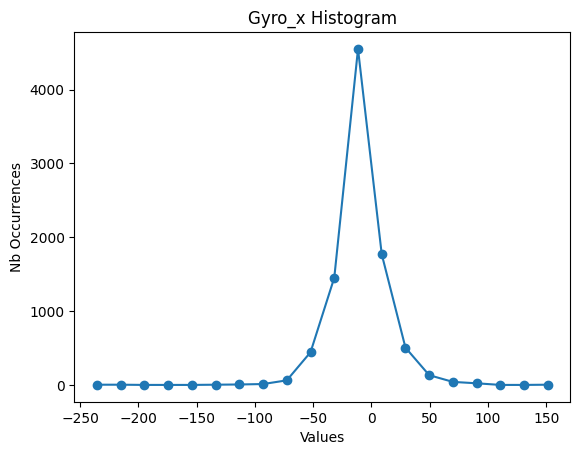

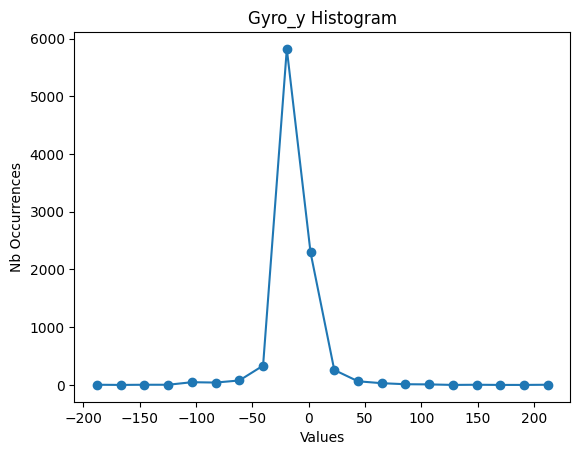

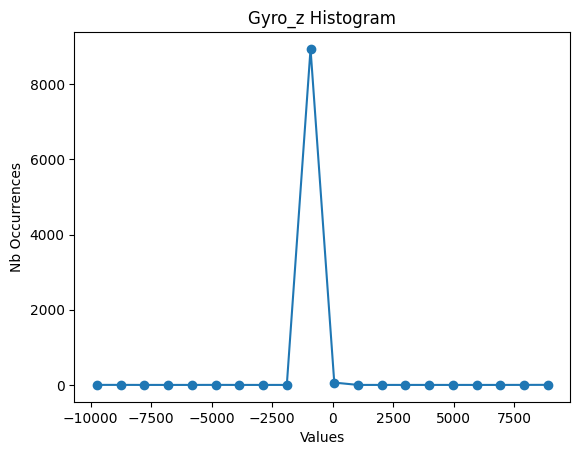

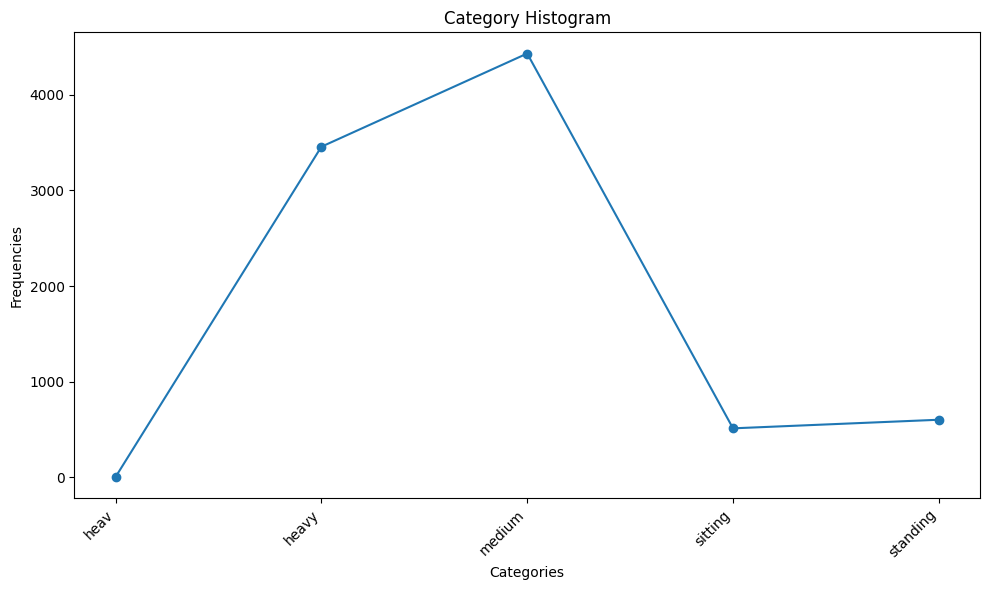

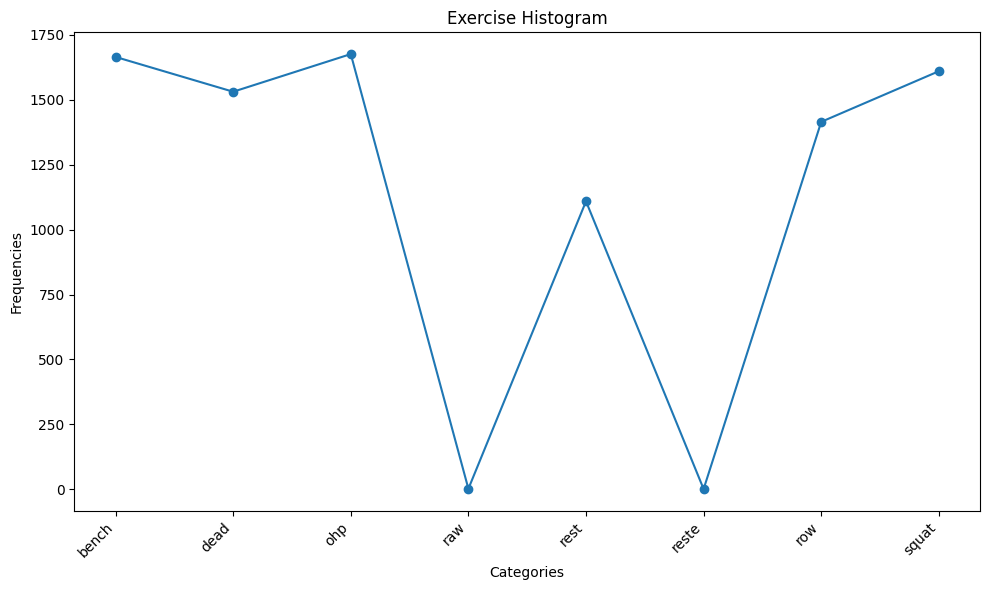

In [15]:

def histogram(attribute_name, attribute_values, bins=50):
    
    cleaned_values = attribute_values[~pd.isna(attribute_values)]
    
    if len(cleaned_values) == 0:
        print("No valid data to plot after removing NaN values.")
        return

   
    if np.issubdtype(attribute_values.dtype, np.number):
        
        counts, bin_edges = np.histogram(cleaned_values, bins=bins)

       
        plt.figure()
        plt.title(f"{attribute_name} Histogram")
        plt.xlabel("Values")
        plt.ylabel("Nb Occurrences")
        plt.plot(bin_edges[:-1], counts, marker='o') 
        plt.show()

    else:
       
        unique_values, counts = np.unique(cleaned_values, return_counts=True)

       
        plt.figure(figsize=(10, 6))
        plt.title(f"{attribute_name} Histogram")
        plt.xlabel("Categories")
        plt.ylabel("Frequencies")
        plt.plot(np.arange(len(unique_values)), counts, marker='o')
        plt.xticks(np.arange(len(unique_values)), unique_values, rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Numerical attributes
histogram("Acc_x", df["Acc_x"].values, bins=20)
histogram("Acc_y", df["Acc_y"].values, bins=20)
histogram("Acc_z", df["Acc_z"].values, bins=20)
histogram("Gyro_x", df["Gyro_x"].values, bins=20)
histogram("Gyro_y", df["Gyro_y"].values, bins=20)
histogram("Gyro_z", df["Gyro_z"].values, bins=20)

# Non-numerical attribute
histogram("Category", df["Category"].values)
histogram("Exercise", df["Exercise"].values)


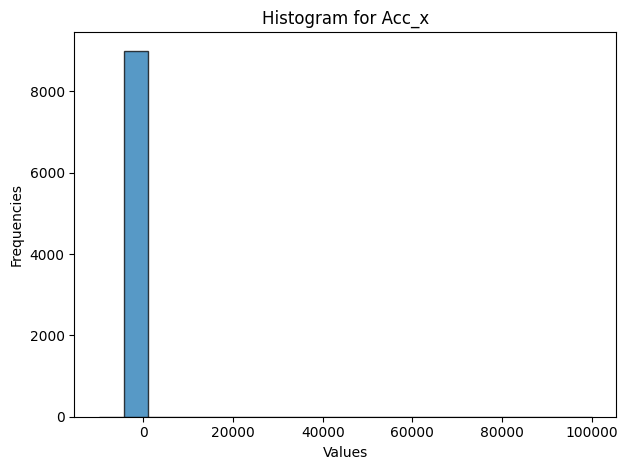

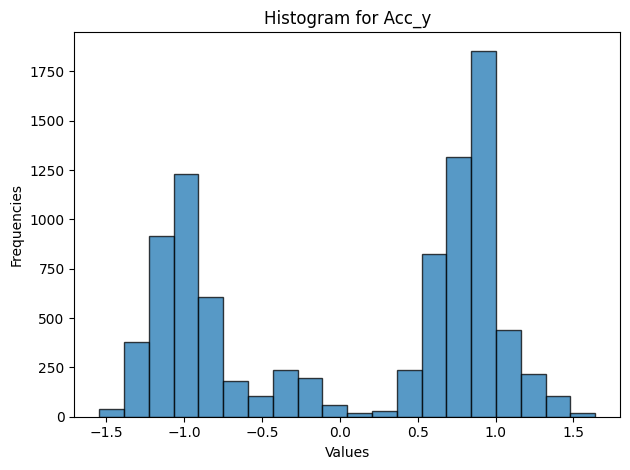

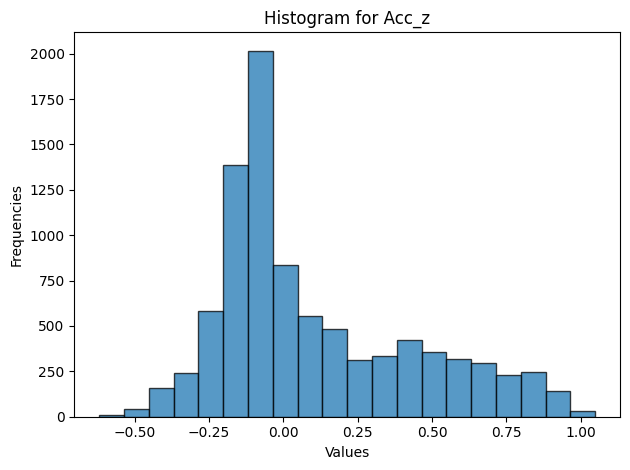

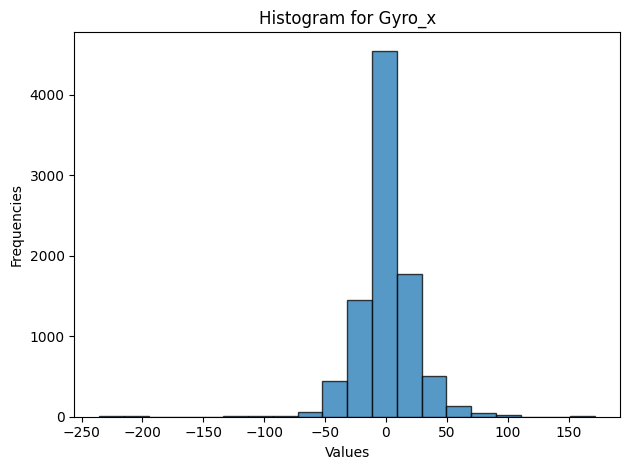

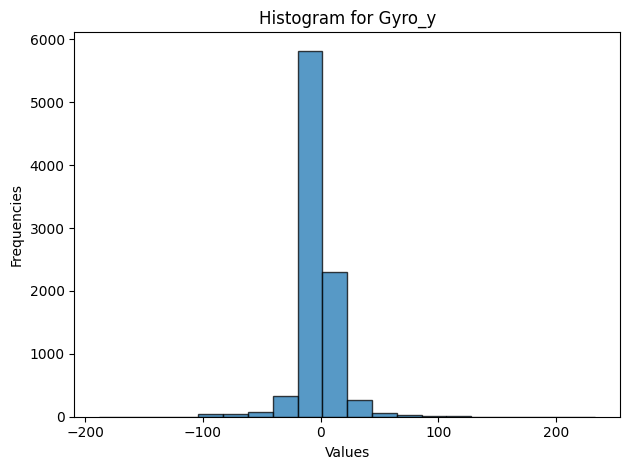

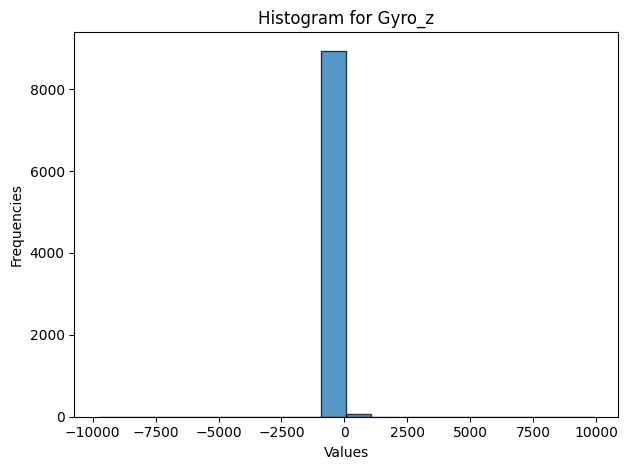

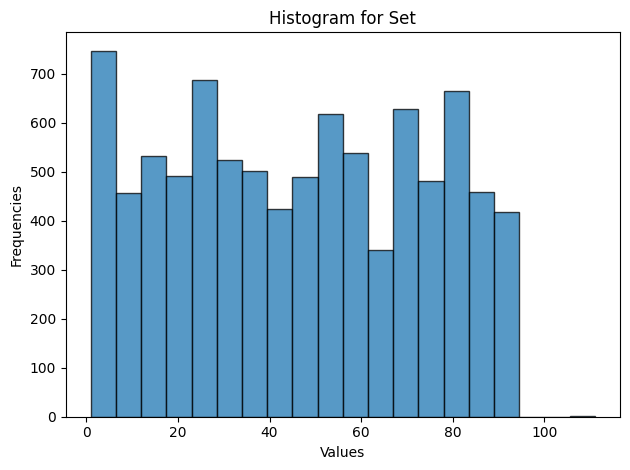

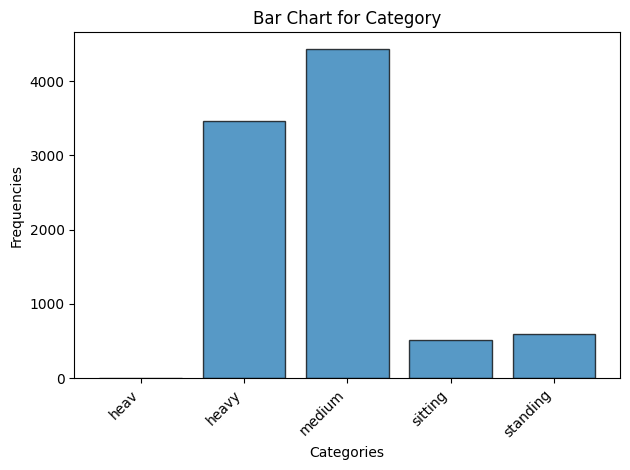

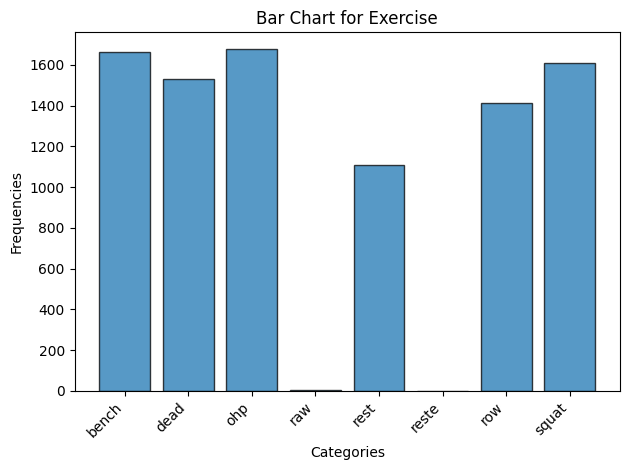

In [12]:
def bar_chart(attribute_name, bins=10):
    
    attribute_values = df[attribute_name]
    
   
    if np.issubdtype(attribute_values.dtype, np.number):
    
        plt.hist(attribute_values.dropna(), bins=bins, edgecolor='k', alpha=0.75)
        plt.xlabel('Values')
        plt.ylabel('Frequencies')
        plt.title(f'Histogram for {attribute_name}')
    else:
      
        unique_values, counts = np.unique(attribute_values.dropna(), return_counts=True)
        plt.bar(unique_values, counts, edgecolor='k', alpha=0.75)
        plt.xlabel('Categories')
        plt.ylabel('Frequencies')
        plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
        plt.title(f'Bar Chart for {attribute_name}')
    

    plt.tight_layout()
    plt.show()


# Numerical attributes
bar_chart("Acc_x", bins=20) 
bar_chart("Acc_y", bins=20)
bar_chart("Acc_z", bins=20)
bar_chart("Gyro_x", bins=20) 
bar_chart("Gyro_y", bins=20)
bar_chart("Gyro_z", bins=20)
bar_chart("Set", bins=20)

# Non-numerical attribute
bar_chart("Category")
bar_chart("Exercise")


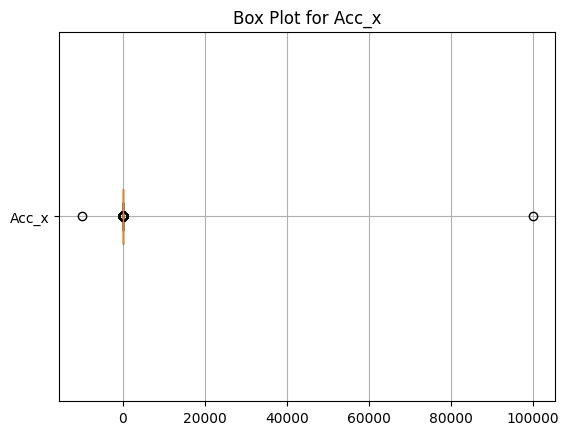

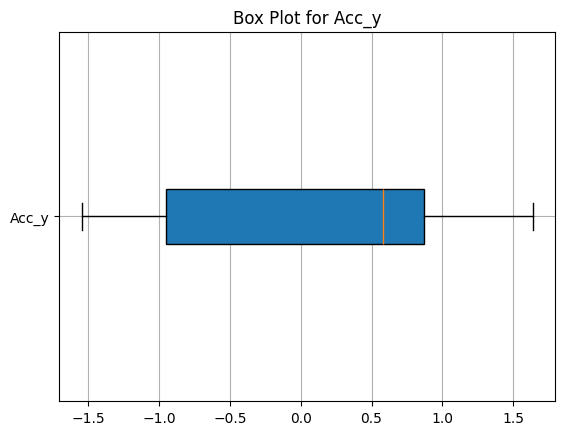

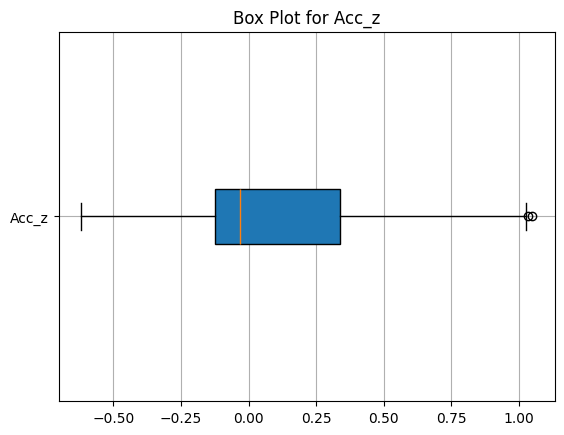

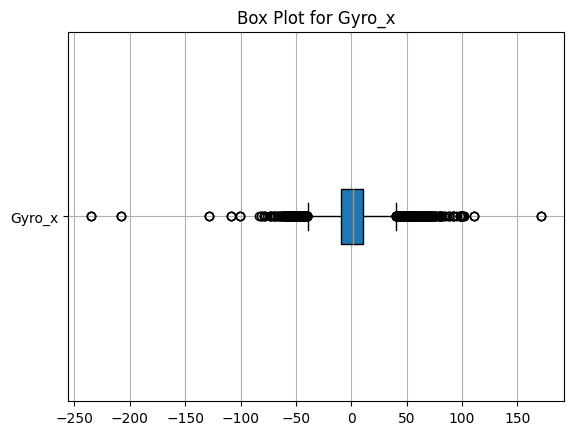

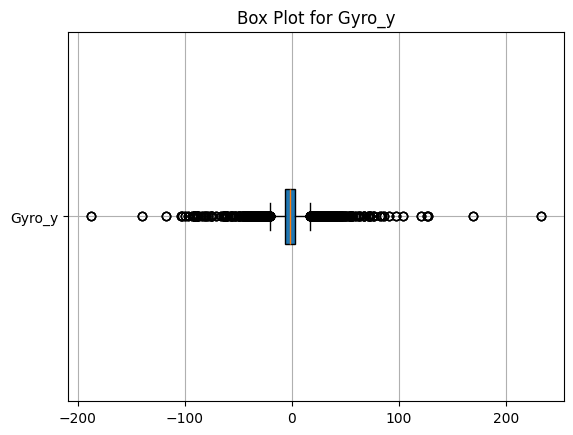

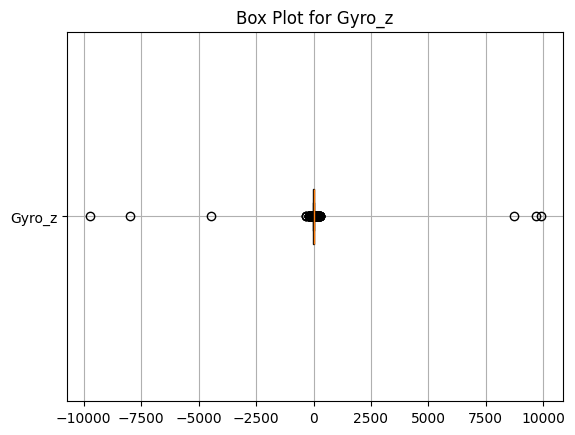

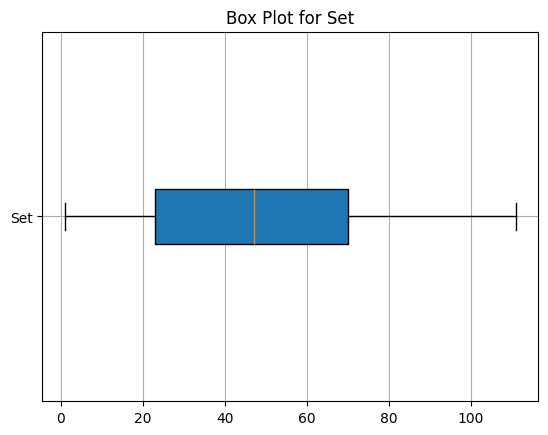

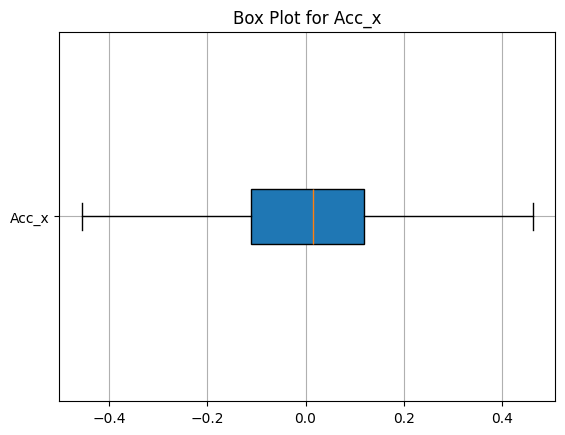

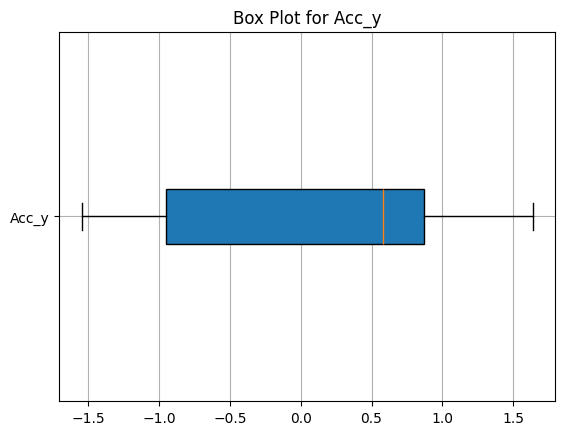

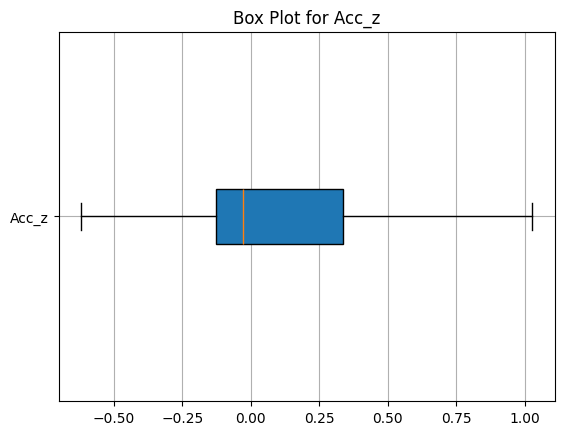

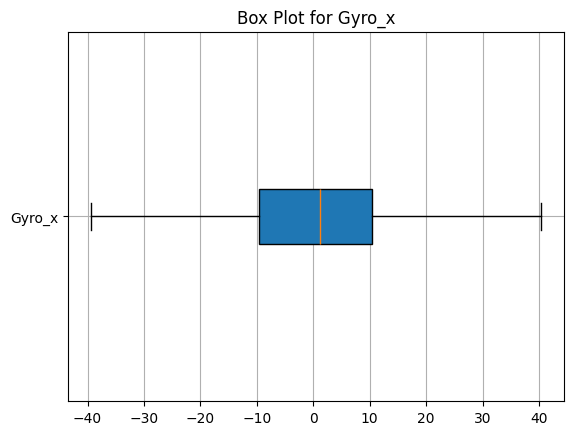

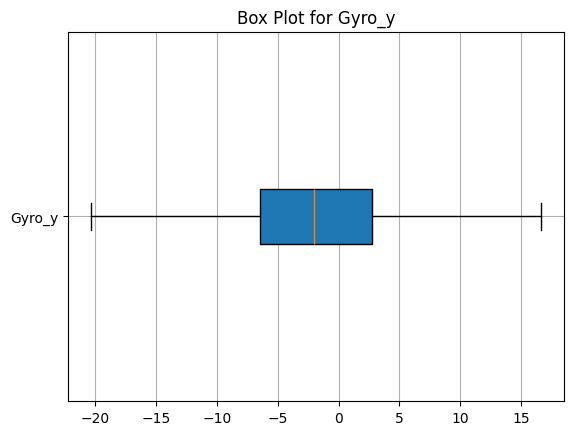

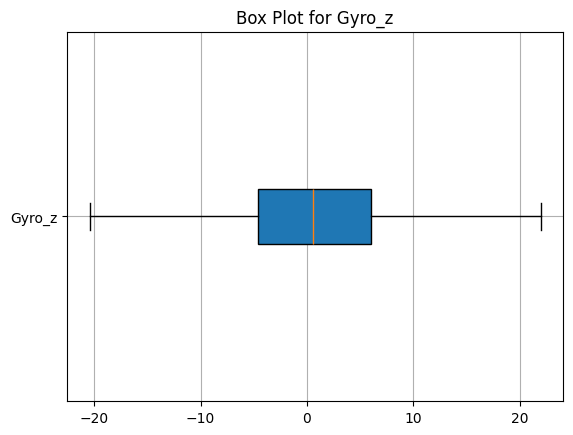

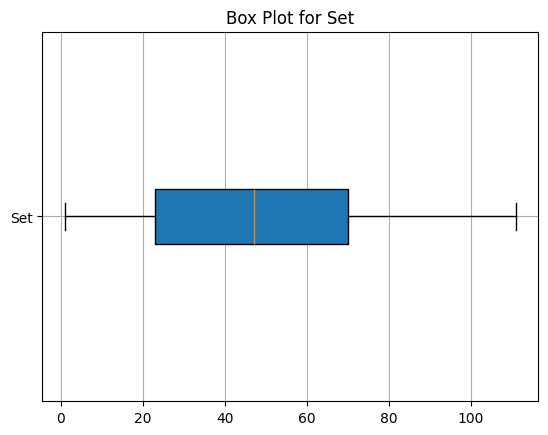

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def generate_box_plot(data, attribute_name, show_outliers=True):
    # Remove NaN values from the data
    cleaned_data = data.dropna()

    # Convert the data to a list or numpy array for compatibility
    cleaned_data = np.array(cleaned_data)
    
    # Create the figure and axis for the plot
    fig, ax = plt.subplots()
    
    # Generate the box plot
    if show_outliers:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)
    
    # Set the title and display grid
    plt.title(f'Box Plot for {attribute_name}')
    plt.grid(True)
    
    # Show the plot
    plt.show()


generate_box_plot(df['Acc_x'], 'Acc_x', show_outliers=True)
generate_box_plot(df['Acc_y'], 'Acc_y', show_outliers=True)
generate_box_plot(df['Acc_z'], 'Acc_z', show_outliers=True)
generate_box_plot(df['Gyro_x'], 'Gyro_x', show_outliers=True)
generate_box_plot(df['Gyro_y'], 'Gyro_y', show_outliers=True)
generate_box_plot(df['Gyro_z'], 'Gyro_z', show_outliers=True)
generate_box_plot(df['Set'], 'Set', show_outliers=True)


generate_box_plot(df['Acc_x'], 'Acc_x', show_outliers=False)
generate_box_plot(df['Acc_y'], 'Acc_y', show_outliers=False)
generate_box_plot(df['Acc_z'], 'Acc_z', show_outliers=False)
generate_box_plot(df['Gyro_x'], 'Gyro_x', show_outliers=False)
generate_box_plot(df['Gyro_y'], 'Gyro_y', show_outliers=False)
generate_box_plot(df['Gyro_z'], 'Gyro_z', show_outliers=False)
generate_box_plot(df['Set'], 'Set', show_outliers=False)
